# 0. Présentation  

## Prediction de risque de credit

### **Introduction**

Dans un contexte où les institutions financières font face à une augmentation des demandes de crédit et à une incertitude économique croissante, la capacité à anticiper les défauts de paiement est devenue un enjeu majeur. Le **scoring de crédit** constitue une solution basée sur les données permettant de prédire la probabilité qu’un client rembourse ou non un prêt.

Ce projet a pour objectif de construire un modèle de **machine learning** capable de détecter les clients présentant un **risque de crédit élevé**, à partir de caractéristiques telles que les antécédents financiers, le comportement de paiement et d'autres variables socio-économiques. L’enjeu principal est de maximiser la détection des clients réellement à risque  tout en évitant les erreurs qui pourraient écarter de bons clients.

### **Bonne lecture**
___ 
- Lien 
    - Données : "https://www.kaggle.com/datasets/laotse/credit-risk-dataset"
    - Profil Github : "https://github.com/ange2219"
    - Profil Kaggle : "https://www.kaggle.com/angedahou"
  

# 1. Importation des packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, yeojohnson
import warnings
warnings.simplefilter('ignore')

# 2. Chargement des données 

In [4]:
data = pd.read_csv('credit_risk_dataset.csv')
data.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [5]:
data.shape

(32581, 12)

In [6]:
data.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

## 2.1. Description de la base de données "credit_risk_dataset.csv"

La base de données " credit_risk_dataset.csv" contient des données sur les clients d'une banque ayant un antecedant de pret

Les caractéristiques (variables explicatives) enregistrées pour chaque client sont les suivantes :


| Variable                   | Signification           |
|----------------------------|-------------------------|
| person_age                 | Age du client           |
| person_income              | Revenu annuel          |
| person_home_ownership      | Type de logement        |
| person_emp_length          | Anciennete_de_lemploie  |
| loan_intent                | Raison_du_pret          |
| loan_grade                 | Qualite_du_pret         |
| loan_amnt                  | Montant_du_pret         |
| loan_int_rate              | Taux_dinteret           |
| loan_status                | Statut_du_pret          |
| loan_percent_income        | Ratio_Pret/Revenue      |
| cb_person_default_on_file  | Defaut_de_payement      |
| cb_person_cred_hist_length | Anciennete_credit       |





La variable cible est :
- loan_status


La base de données contient 32581 entrées (lignes) et 12 caractéristiques (colonnes).

In [7]:
# Renommer les colonnes
data.rename(columns={
    'person_age' : 'Age', 
    'person_income' : 'Revenu_annuel', 
    'person_home_ownership' : 'Type_de_logement', 
    'person_emp_length' : 'Anciennete_de_lemploie', 
    'loan_intent' : 'Raison_du_pret', 
    'loan_grade' : 'Qualite_du_pret', 
    'loan_amnt' : 'Montant_du_pret',
    'loan_int_rate' : 'Taux_dinteret', 
    'loan_status' : 'Statut_du_pret', 
    'loan_percent_income' : 'Ratio_Pret/Revenue',
    'cb_person_default_on_file' : 'Defaut_de_payement', 
    'cb_person_cred_hist_length' : 'Anciennete_credit'
}, inplace=True)

# Afficher les noms de colonnes mis à jour
print(data.columns)

Index(['Age', 'Revenu_annuel', 'Type_de_logement', 'Anciennete_de_lemploie',
       'Raison_du_pret', 'Qualite_du_pret', 'Montant_du_pret', 'Taux_dinteret',
       'Statut_du_pret', 'Ratio_Pret/Revenue', 'Defaut_de_payement',
       'Anciennete_credit'],
      dtype='object')


In [8]:
data['Type_de_logement'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [9]:
data['Type_de_logement'].replace({'RENT' : 'Locataire', 
                                'OWN' : 'Proprietaire', 
                                'MORTGAGE' : 'En_cours_dachat', 
                                'OTHER' : 'Autre'}, inplace = True)

In [10]:
data['Raison_du_pret'].replace({'PERSONAL' : 'Personnel', 
                                'EDUCATION' : 'Scolarite', 
                                'MEDICAL' : 'Medical', 
                                'VENTURE' : 'Projet_pro', 
                                'HOMEIMPROVEMENT' : 'Renovation',
                                'DEBTCONSOLIDATION' : 'Regrp_dette'}, inplace = True)

## 2.2. Qualité des données

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     32581 non-null  int64  
 1   Revenu_annuel           32581 non-null  int64  
 2   Type_de_logement        32581 non-null  object 
 3   Anciennete_de_lemploie  31686 non-null  float64
 4   Raison_du_pret          32581 non-null  object 
 5   Qualite_du_pret         32581 non-null  object 
 6   Montant_du_pret         32581 non-null  int64  
 7   Taux_dinteret           29465 non-null  float64
 8   Statut_du_pret          32581 non-null  int64  
 9   Ratio_Pret/Revenue      32581 non-null  float64
 10  Defaut_de_payement      32581 non-null  object 
 11  Anciennete_credit       32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [12]:
data.describe(include = 'all')

,Age,Revenu_annuel,Type_de_logement,Anciennete_de_lemploie,Raison_du_pret,Qualite_du_pret,Montant_du_pret,Taux_dinteret,Statut_du_pret,Ratio_Pret/Revenue,Defaut_de_payement,Anciennete_credit
count,32581.000000,3.258100e+04,32581,31686.000000,32581,32581,32581.000000,29465.000000,32581.000000,32581.000000,32581,32581.000000
unique,NaN,NaN,4,NaN,6,7,NaN,NaN,NaN,NaN,2,NaN
top,NaN,NaN,Locataire,NaN,Scolarite,A,NaN,NaN,NaN,NaN,N,NaN
freq,NaN,NaN,16446,NaN,6453,10777,NaN,NaN,NaN,NaN,26836,NaN
mean,27.734600,6.607485e+04,NaN,4.789686,NaN,NaN,9589.371106,11.011695,0.218164,0.170203,NaN,5.804211
std,6.348078,6.198312e+04,NaN,4.142630,NaN,NaN,6322.086646,3.240459,0.413006,0.106782,NaN,4.055001
min,20.000000,4.000000e+03,NaN,0.000000,NaN,NaN,500.000000,5.420000,0.000000,0.000000,NaN,2.000000
25%,23.000000,3.850000e+04,NaN,2.000000,NaN,NaN,5000.000000,7.900000,0.000000,0.090000,NaN,3.000000
50%,26.000000,5.500000e+04,NaN,4.000000,NaN,NaN,8000.000000,10.990000,0.000000,0.150000,NaN,4.000000
75%,30.000000,7.920000e+04,NaN,7.000000,NaN,NaN,12200.000000,13.470000,0.000000,0.230000,NaN,8.000000


In [13]:
data.isna().sum()

Age                          0
Revenu_annuel                0
Type_de_logement             0
Anciennete_de_lemploie     895
Raison_du_pret               0
Qualite_du_pret              0
Montant_du_pret              0
Taux_dinteret             3116
Statut_du_pret               0
Ratio_Pret/Revenue           0
Defaut_de_payement           0
Anciennete_credit            0
dtype: int64

# 3. Analyse Exploratoire de données (EDA)

## 3.0. Creeation de nouvelle variable 

Pour les variables comme les ages, les variables auquelles on peut donner des categorie, on peut
les divisier aver les quartiles :
- Les variable inferieur au 1ier quartile (var < quantile(0.25))
- Les variables compris entre le 1ier et le 2ime quartile(quantile(0.25) < var < quantile(0.5))
- les variables compris entre le 2ier et le 3ime quartile(quantile(0.5) < var < quantile(0.75))
- Les variable superieur au 3ier quartile (var < quantile(0.75))

In [14]:
df = data.copy()

In [15]:
df.head()

,Age,Revenu_annuel,Type_de_logement,Anciennete_de_lemploie,Raison_du_pret,Qualite_du_pret,Montant_du_pret,Taux_dinteret,Statut_du_pret,Ratio_Pret/Revenue,Defaut_de_payement,Anciennete_credit
0,22,59000,Locataire,123.0,Personnel,D,35000,16.02,1,0.59,Y,3
1,21,9600,Proprietaire,5.0,Scolarite,B,1000,11.14,0,0.10,N,2
2,25,9600,En_cours_dachat,1.0,Medical,C,5500,12.87,1,0.57,N,3
3,23,65500,Locataire,4.0,Medical,C,35000,15.23,1,0.53,N,2
4,24,54400,Locataire,8.0,Medical,C,35000,14.27,1,0.55,Y,4


## 3.1. Analyse univariée

Statut_du_pret
0    0.781836
1    0.218164
Name: proportion, dtype: float64


<Axes: xlabel='Statut_du_pret', ylabel='count'>

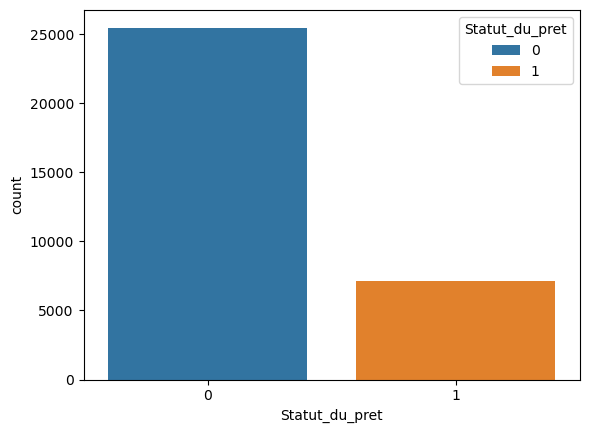

In [16]:
print(df['Statut_du_pret'].value_counts(normalize = True))
sns.countplot(data = df, x = 'Statut_du_pret', hue = 'Statut_du_pret')

In [17]:
variable_categorielle = ['Type_de_logement', 'Raison_du_pret', 'Qualite_du_pret', 'Defaut_de_payement']

In [18]:
variable_numerique = ['Age', 'Revenu_annuel', 
                      'Anciennete_de_lemploie', 'Montant_du_pret', 
                      'Taux_dinteret', 'Ratio_Pret/Revenue', 'Anciennete_credit']

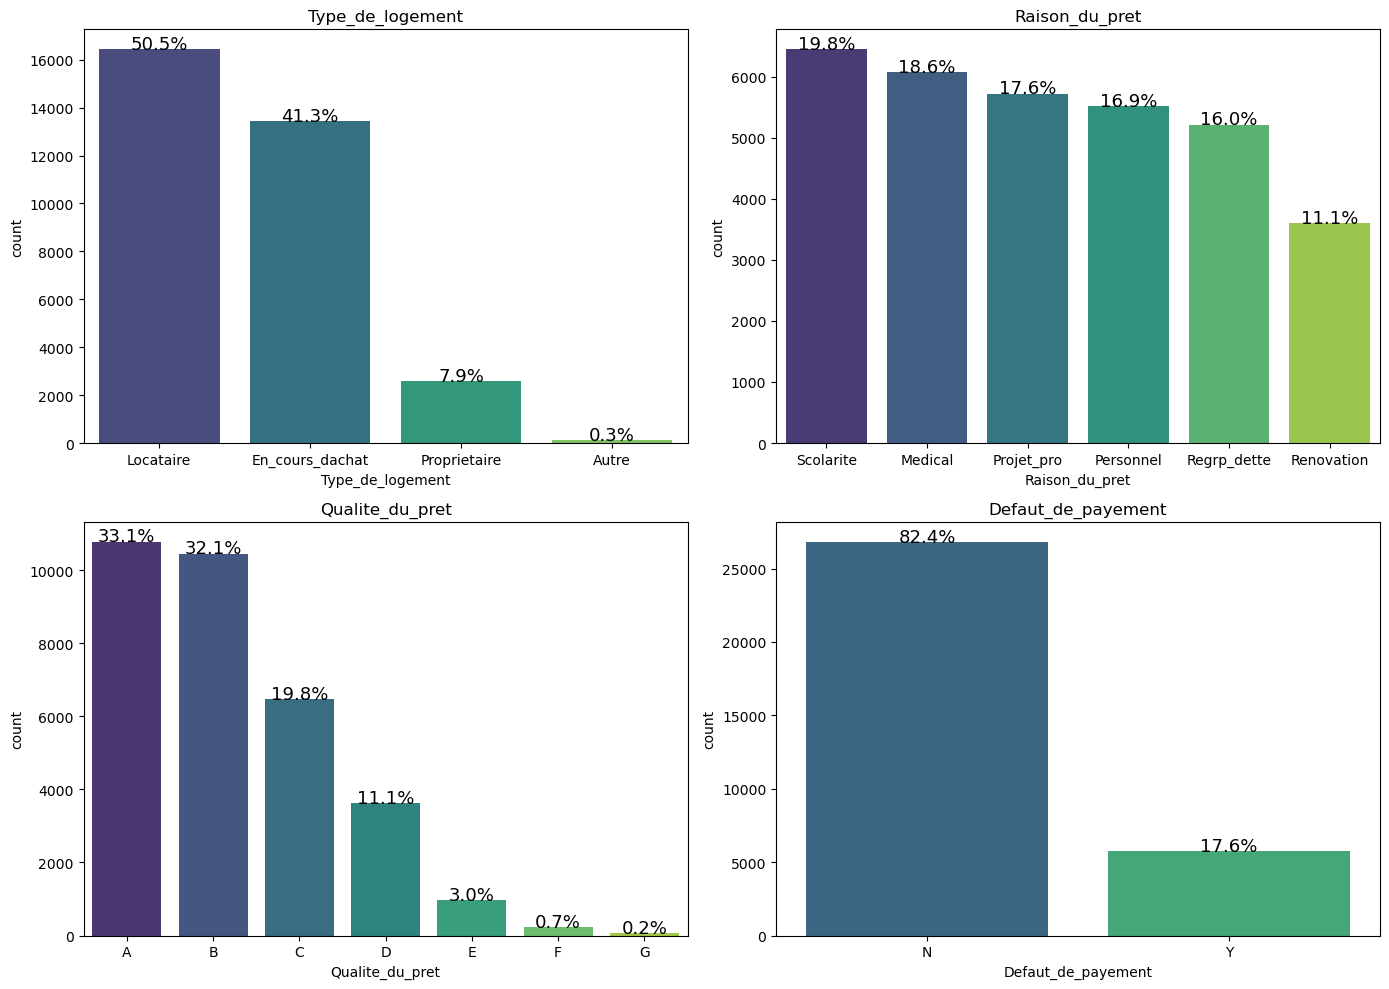

In [19]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, variable_categorielle):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, palette = 'viridis', order = ordre,  ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}%', ha = 'center', fontsize = 13)
        ax.set_title(col)
        #ax.tick_params(axis = 'x', rotation = 30)
plt.tight_layout()
plt.show()

In [20]:
df[variable_numerique].skew()

Age                        2.581393
Revenu_annuel             32.865349
Anciennete_de_lemploie     2.614455
Montant_du_pret            1.192477
Taux_dinteret              0.208550
Ratio_Pret/Revenue         1.064669
Anciennete_credit          1.661790
dtype: float64

In [21]:
df['Revenu_annuel'] = np.log(df['Revenu_annuel'])
df['Revenu_annuel'].skew()

0.1559408016162584

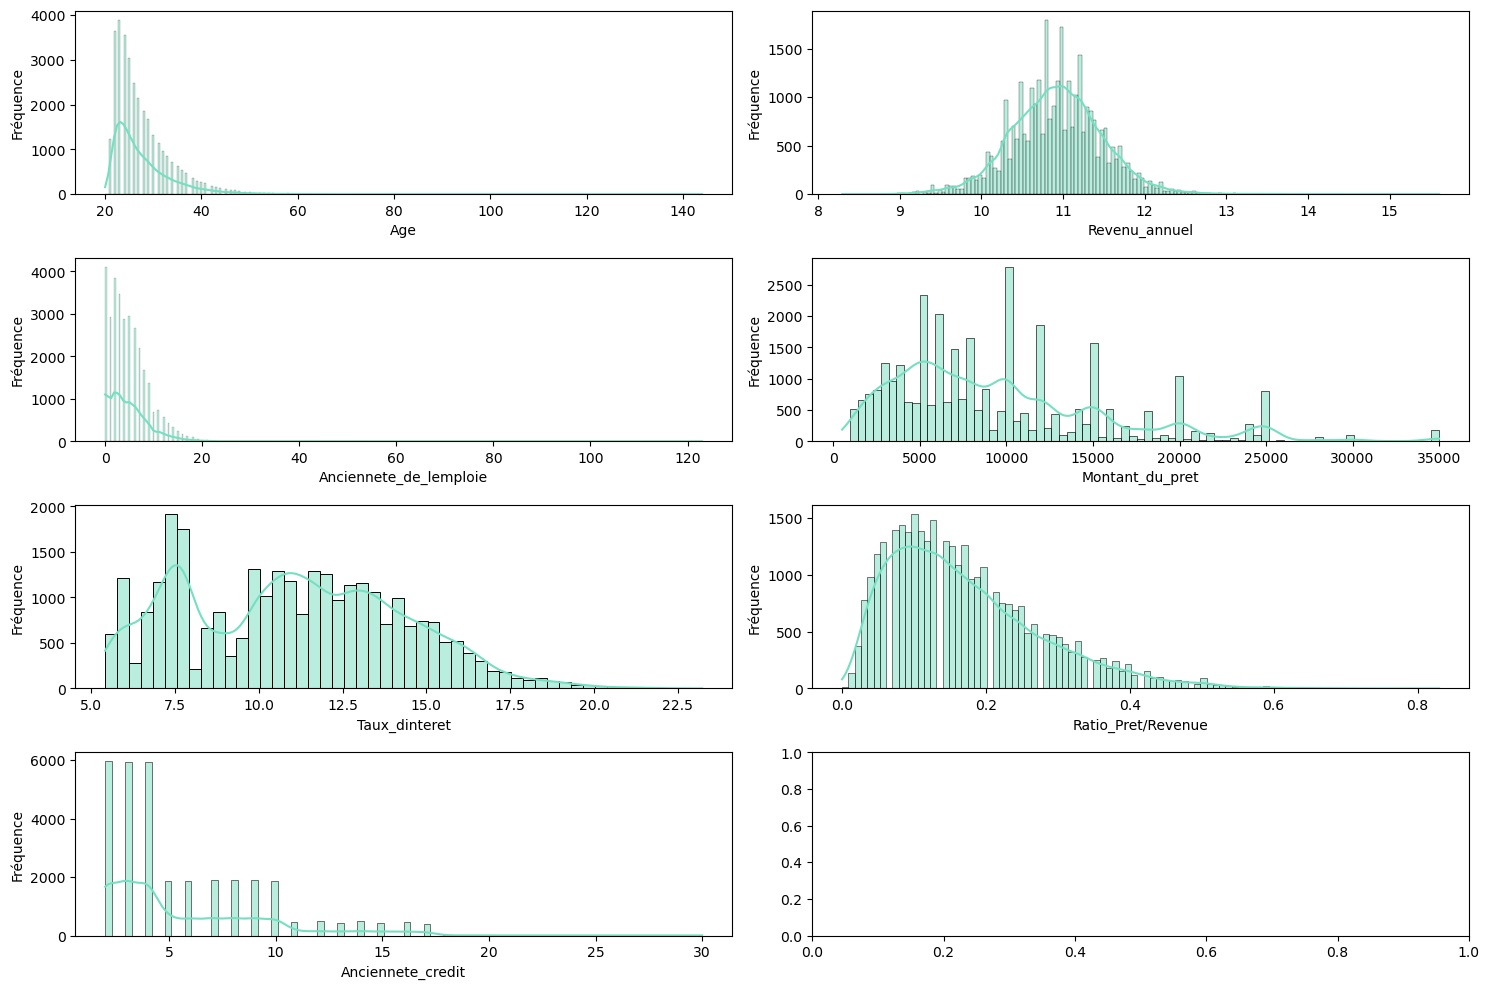

In [22]:
fig, axes = plt.subplots(4, 2, figsize = (15, 10))
axes = axes.flatten()
for ax, col in zip(axes, variable_numerique):
    sns.histplot(data = df[col] , ax = ax, kde=True, color='#75DFC1', edgecolor='black')
    ax.set_xlabel(col)
    ax.set_ylabel('Fréquence')
plt.tight_layout()
plt.show()

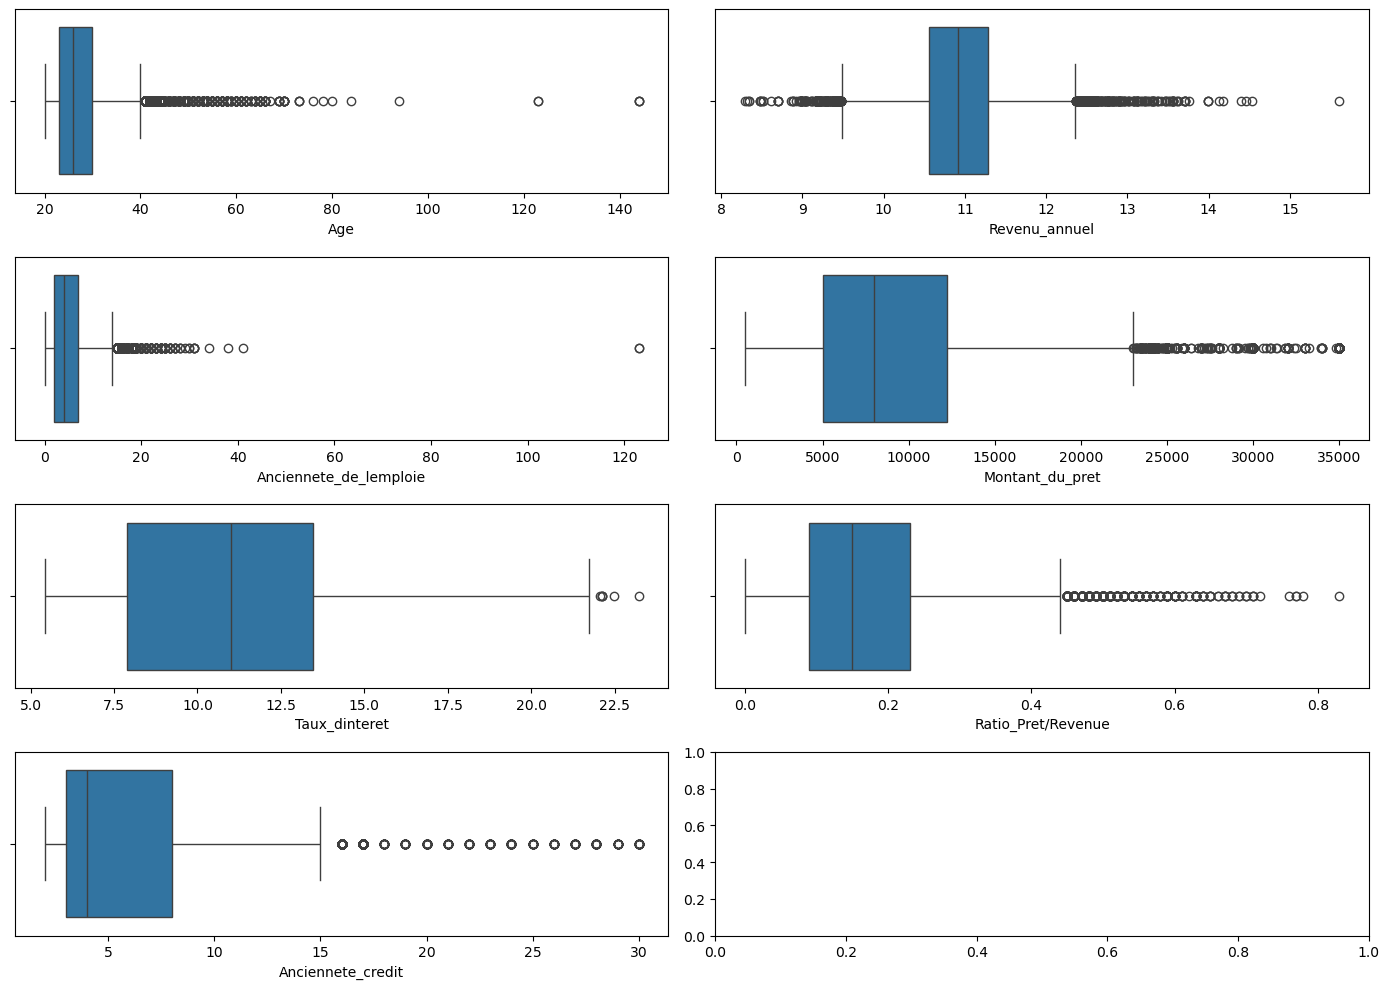

In [23]:
fig, axes = plt.subplots(4, 2, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, variable_numerique):
    sns.boxplot(data = df, x = col, ax = ax)
plt.tight_layout()
plt.show()

## 3.2. Analyse bivariée

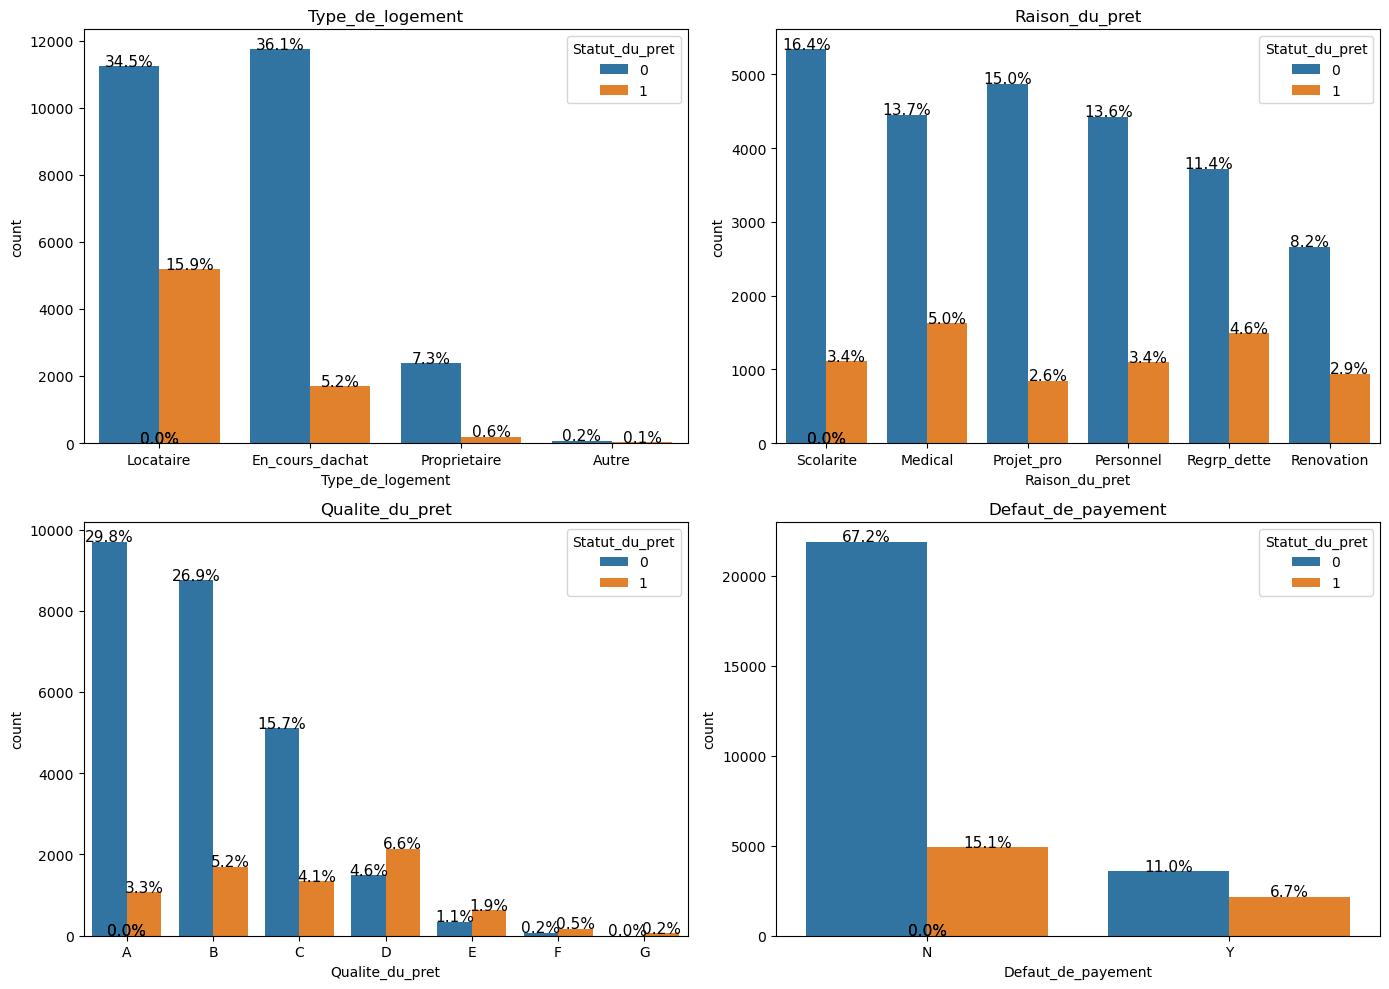

In [24]:
fig, axes = plt.subplots(2, 2, figsize = (14, 10))
axes = axes.flatten()
for ax, col in zip(axes, variable_categorielle):
    ordre = df[col].value_counts().index
    sns.countplot(data = df, x = col, hue = 'Statut_du_pret', order = ordre,  ax = ax)
    total = len(df)
    for bar in ax.patches:
        count = bar.get_height()
        pct = 100*count/total
        x = bar.get_x() + bar.get_width()/2
        y = bar.get_height() + 5
        ax.text(x, y + 1, f'{pct:.1f}%', ha = 'center', fontsize = 11)
        ax.set_title(col)
        #ax.tick_params(axis = 'x', rotation = 30)
plt.tight_layout()
plt.show()

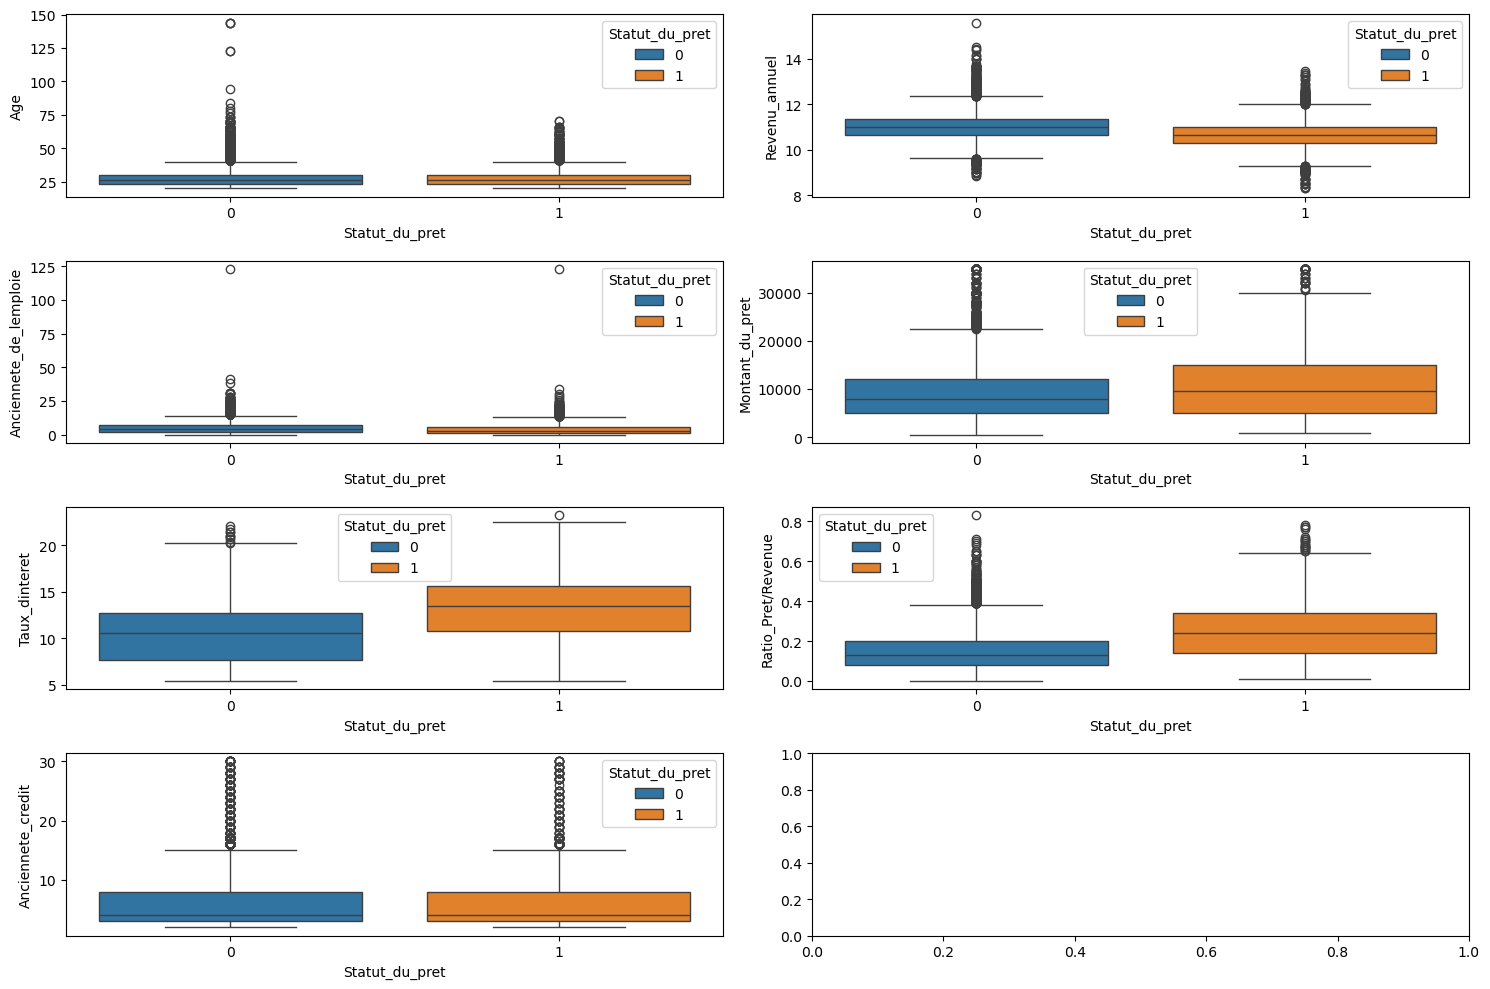

In [25]:
fig, axes = plt.subplots(4, 2, figsize = (15, 10))
axes = axes.flatten()
for ax, col in zip(axes, variable_numerique):
    sns.boxplot(data = df, y = col, x = 'Statut_du_pret', hue = 'Statut_du_pret', ax = ax)
    ax.set_xlabel('Statut_du_pret')
    ax.set_ylabel(col)
plt.tight_layout()
plt.show()

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [27]:
# Nous utilisons le LabelEncoding parce que les variables est qualitative ordinal
df['Qualite_du_pret'] = encoder.fit_transform(df['Qualite_du_pret'])

In [28]:
print(df['Type_de_logement'].unique())
print(df['Raison_du_pret'].unique())
print(df['Defaut_de_payement'].unique())

['Locataire' 'Proprietaire' 'En_cours_dachat' 'Autre']
['Personnel' 'Scolarite' 'Medical' 'Projet_pro' 'Renovation' 'Regrp_dette']
['Y' 'N']


In [29]:
df['Type_de_logement'].replace({'Locataire' : 0,
                                'Proprietaire' : 1,
                                'En_cours_dachat' : 2,
                                'Autre' : 3}, inplace = True)

df['Raison_du_pret'].replace({'Personnel' : 0,
                             'Scolarite' : 1, 
                              'Medical' : 2,
                              'Projet_pro' : 3,
                              'Renovation' : 4, 
                              'Regrp_dette' : 5}, inplace = True)

df['Defaut_de_payement'].replace({'Y' : 1,
                                  'N' : 0}, inplace = True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     32581 non-null  int64  
 1   Revenu_annuel           32581 non-null  float64
 2   Type_de_logement        32581 non-null  int64  
 3   Anciennete_de_lemploie  31686 non-null  float64
 4   Raison_du_pret          32581 non-null  int64  
 5   Qualite_du_pret         32581 non-null  int32  
 6   Montant_du_pret         32581 non-null  int64  
 7   Taux_dinteret           29465 non-null  float64
 8   Statut_du_pret          32581 non-null  int64  
 9   Ratio_Pret/Revenue      32581 non-null  float64
 10  Defaut_de_payement      32581 non-null  int64  
 11  Anciennete_credit       32581 non-null  int64  
dtypes: float64(4), int32(1), int64(7)
memory usage: 2.9 MB


# 4. Preprocessing

In [31]:
print(df.duplicated().sum())
df.drop_duplicates(inplace = True)
df.reset_index(drop = True, inplace = True)
print(df.duplicated().sum())

165
0


In [32]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=3)
df[['Taux_dinteret', 'Anciennete_de_lemploie']] = imputer.fit_transform(df[['Taux_dinteret', 'Anciennete_de_lemploie']])

In [33]:
df.isna().sum()

Age                       0
Revenu_annuel             0
Type_de_logement          0
Anciennete_de_lemploie    0
Raison_du_pret            0
Qualite_du_pret           0
Montant_du_pret           0
Taux_dinteret             0
Statut_du_pret            0
Ratio_Pret/Revenue        0
Defaut_de_payement        0
Anciennete_credit         0
dtype: int64

In [34]:
#iqr = Q3 - Q1
# outliers = Q1 - 1.5 * iqr ou Q3 + 1.5 * iqr
def finding_outliers(variable_name, data): 
    iqr = data[variable_name].quantile(0.75) - data[variable_name].quantile(0.25)
    lower = data[variable_name].quantile(0.25) - 1.5 * iqr
    upper = data[variable_name].quantile(0.75) + 1.5 * iqr
    return data[(data[variable_name] < lower) | (data[variable_name] > upper)]

In [35]:
finding_outliers('Age', df).sort_values('Age')

,Age,Revenu_annuel,Type_de_logement,Anciennete_de_lemploie,Raison_du_pret,Qualite_du_pret,Montant_du_pret,Taux_dinteret,Statut_du_pret,Ratio_Pret/Revenue,Defaut_de_payement,Anciennete_credit
31704,41,11.838987,2,8.0,2,3,23000,14.960000,1,0.14,0,12
31195,41,11.407565,2,23.0,3,0,13200,6.620000,0,0.15,0,13
31192,41,11.635143,0,1.0,3,3,12000,16.000000,1,0.11,1,15
31188,41,11.736069,0,0.0,5,2,12000,13.490000,0,0.10,1,12
29476,41,10.915088,0,9.0,5,1,12000,12.530000,0,0.22,0,15
...,...,...,...,...,...,...,...,...,...,...,...,...
747,123,11.264464,0,7.0,3,1,20000,15.023333,0,0.26,0,4
575,123,11.289832,0,2.0,1,1,20400,10.250000,0,0.25,0,3
32132,144,15.607270,2,12.0,0,2,5000,12.730000,0,0.00,0,25
183,144,12.206073,2,4.0,1,1,6000,11.860000,0,0.03,0,2


Les outliers ici sont supperieur a 41 ans, ca aserait grave de considerer que les clients qui ont plus de 41 ans ne devrais pas avoir un pret. 
D'apres mes recherches, les banques n'octroie pas de pret apres 75 ans (Risque de deces)
Nous allons continer avec ça

Text(0.5, 1.0, 'Carte de chaleur des correlation')

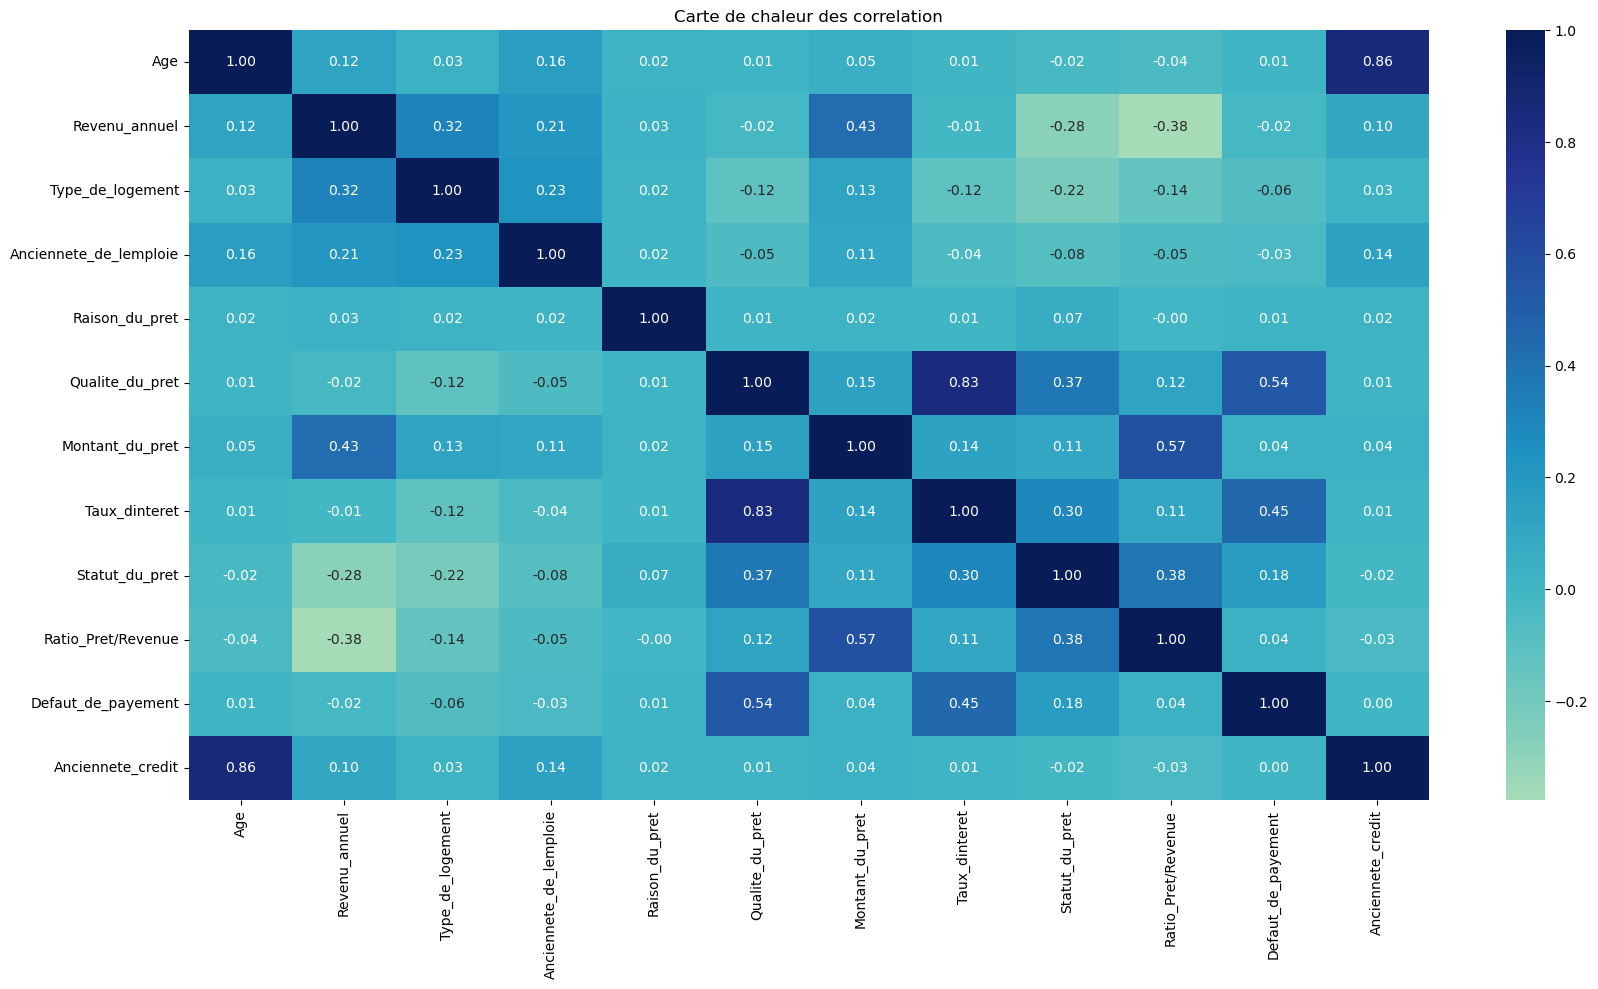

In [36]:
corr_matrix = df.corr()

# Carte de chaleur pour visualiser les correlations
plt.figure(figsize = (20, 10))
sns.heatmap(corr_matrix, annot = True, fmt = '.2f', cmap = 'YlGnBu', center = 0)
plt.title('Carte de chaleur des correlation')

# 5. Modelisation 

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, RFECV
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_recall_curve, classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
seed = 42

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [39]:
X = df.drop('Statut_du_pret', axis = 1)
X_scaled = scaler.fit_transform(X)
y = df['Statut_du_pret']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = seed, stratify = y)

In [41]:
def evaluation(model, X_train, y_train):
    

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv = 5, 
                                                      scoring = 'f1', train_sizes = np.linspace(0.1, 1,5), n_jobs=-1)
    plt.figure(figsize = (12, 8))
    plt.plot(N, train_score.mean(axis = 1), label = 'train_score')
    plt.plot(N, val_score.mean(axis = 1), label = 'val_score')
    plt.show()

In [42]:
XGBClassifier = XGBClassifier (n_estimators = 20, random_state = seed, learning_rate = 0.5 , scale_pos_weight = 1, base_score = 0.2)
AdaBoostClassifier = AdaBoostClassifier(n_estimators = 20, random_state = seed)
RandomForestClassifier = RandomForestClassifier(n_estimators = 20, random_state = seed)
DecisionTreeClassifier = DecisionTreeClassifier(random_state = seed)
LogisticRegression = LogisticRegression(random_state = seed)
KNeighborsClassifier = KNeighborsClassifier()
SVC = SVC(random_state = seed)

In [43]:
dicts_of_models = {'XGB':XGBClassifier, 
                   #'AdaBoostClassifier':AdaBoostClassifier, 
                   #'RandomForestClassifier':RandomForestClassifier, 
                   #'DecisionTreeClassifier':DecisionTreeClassifier, 
                   #'LogisticRegression':LogisticRegression,
                   #'KNeighborsClassifier':KNeighborsClassifier, 
                   #'SVC':SVC
                   }

XGB
[[5035   31]
 [ 379 1039]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      5066
           1       0.97      0.73      0.84      1418

    accuracy                           0.94      6484
   macro avg       0.95      0.86      0.90      6484
weighted avg       0.94      0.94      0.93      6484



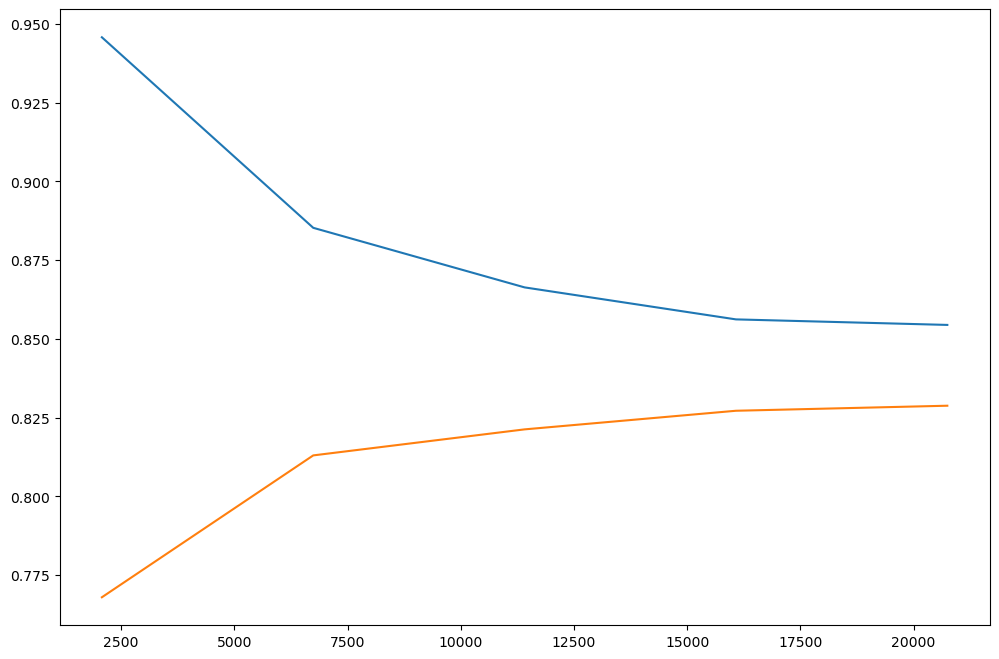

In [44]:
for name, model in dicts_of_models.items():
    print(name)
    evaluation(model, X_train, y_train)

# 6. Optimisation

In [45]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [47]:
xgb = XGBClassifier(use_label_encoder=False, enable_categorical = True, eval_metric='mlogloss')

In [48]:
param_grid = {
    'n_estimators': [20, 50, 100],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1]
}
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           verbose=1,
                           n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Meilleurs paramètres :", grid_search.best_params_)
print("Meilleur score CV :", grid_search.best_score_)

model_final = grid_search.best_estimator_

Fitting 3 folds for each of 24 candidates, totalling 72 fits
Meilleurs paramètres : {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
Meilleur score CV : 0.9351766157643066


[[5059   14]
 [ 393 1018]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      5073
           1       0.99      0.72      0.83      1411

    accuracy                           0.94      6484
   macro avg       0.96      0.86      0.90      6484
weighted avg       0.94      0.94      0.93      6484



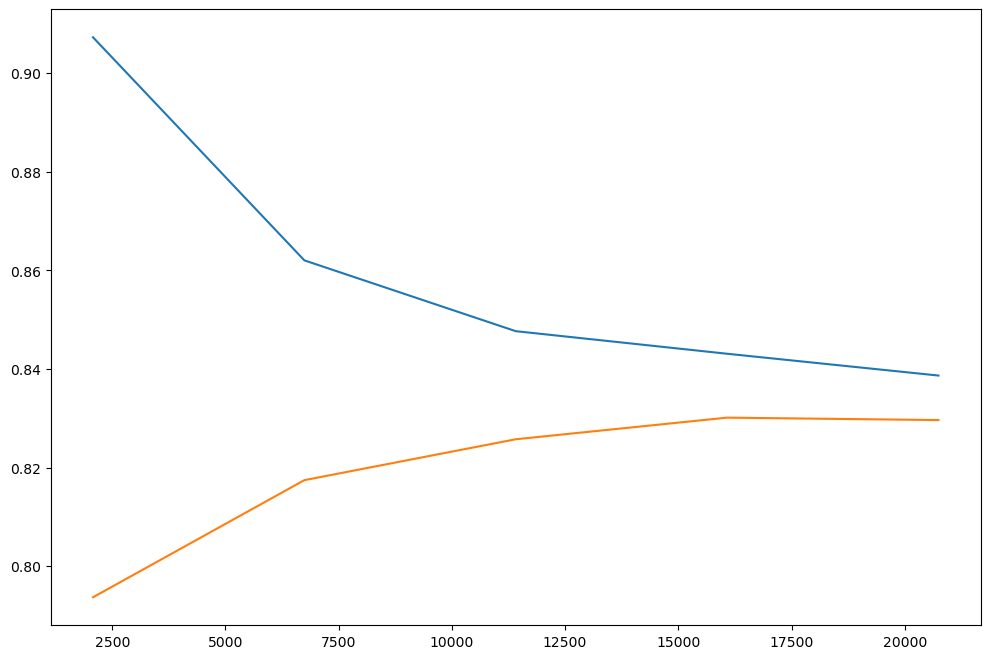

In [49]:
evaluation(model_final, X_train, y_train)

Seuil optimal (F1 max): 0.36


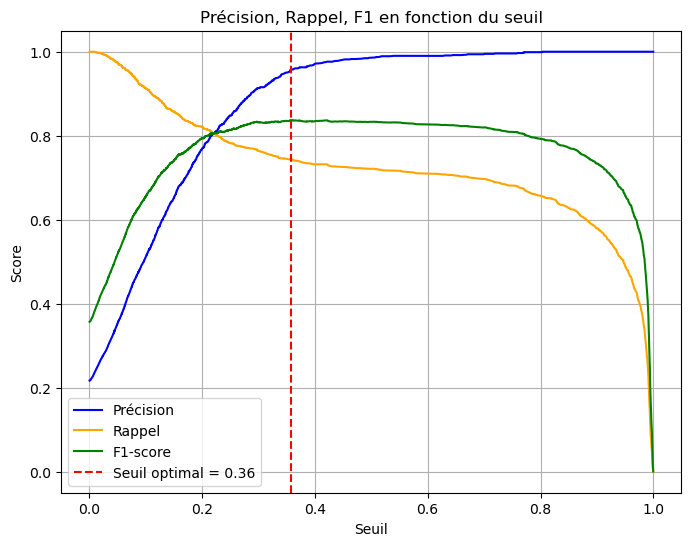

In [50]:
from sklearn.metrics import precision_recall_curve, f1_score

# Étape 1 : Probabilités
y_probs = model_final.predict_proba(X_test)[:, 1]

# Étape 2 : Courbe
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

# Étape 3 : F1-score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-6)
best_index = f1_scores.argmax()
best_threshold = thresholds[best_index]
print(f"Seuil optimal (F1 max): {best_threshold:.2f}")

# Étape 4 : Tracer
plt.figure(figsize=(8,6))
plt.plot(thresholds, precision[:-1], label='Précision', color='blue')
plt.plot(thresholds, recall[:-1], label='Rappel', color='orange')
plt.plot(thresholds, f1_scores[:-1], label='F1-score', color='green')
plt.axvline(best_threshold, color='red', linestyle='--', label=f'Seuil optimal = {best_threshold:.2f}')
plt.xlabel('Seuil')
plt.ylabel('Score')
plt.title('Précision, Rappel, F1 en fonction du seuil')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
import joblib

joblib.dump(value = model_final, filename = 'credit_risk.plk')

['credit_risk.plk']

# 7. Conclusion

## **Évaluation du modèle de prédiction du risque de crédit**

Le modèle construit à l’aide de **XGBoostClassifier** a été sélectionné après comparaison avec plusieurs autres algorithmes. Bien que le **seuil optimal proposé par la courbe F1** soit d’environ **0.45**, nous avons décidé de conserver le **seuil par défaut de 0.5**. Cette décision est justifiée par le fait que les **améliorations de score étaient marginales**, et que conserver le seuil par défaut facilite l’interprétation métier et l’implémentation.

En analysant la **matrice de confusion**, nous avons porté une attention particulière aux **faux positifs (FP)** et **faux négatifs (FN)** :

* **Faux positifs (FP)** : clients identifiés à tort comme risqués. Cela peut mener à des refus de crédit injustifiés. Ce type d'erreur est coûteux en **perte d’opportunités commerciales**.
* **Faux négatifs (FN)** : clients réellement risqués mais prédits comme sûrs. C’est l’erreur la plus **critique** car elle entraîne des **pertes financières directes** (défauts de paiement).
* **Vrais positifs (VP)** : clients bien identifiés comme risqués.
* **Vrais négatifs (VN)** : clients bien identifiés comme non-risqués.

Notre modèle a su maintenir un **bon équilibre entre précision et rappel**, comme le montre un **F1-score de 0.83** sur la classe minoritaire. Ce score indique que le modèle est capable de **détecter efficacement les clients à risque**, sans trop sacrifier la précision.

## **Pourquoi ce modèle est adapté au problème**

* Le modèle est **rapide à entraîner** et **interprétable** grâce à l’analyse des **features importantes**.
* Il peut être facilement intégré dans une **application de scoring de crédit** pour une **prise de décision automatisée**.
* Il est suffisamment **général** pour être réutilisé sur d’autres bases de clients avec un minimum de retraining.

## **Impact métier**

* Aide les institutions financières à **réduire les risques de défaut**
* Permet de **prioriser les vérifications manuelles** sur les dossiers incertains
* Facilite une **gestion plus intelligente du portefeuille de prêts**

